In [1]:
#Brandon Van Nice made this part
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import os
import pprint
from statistics import median

In [2]:
# File to Load (Remember to change these)
collegeData = "Most-Recent-Cohorts-Scorecard-Elements.csv"

In [3]:
collegeData_df = pd.read_csv(collegeData)

In [4]:
#view data
collegeData_df.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,INSTURL,NPCURL,HCM2,PREDDEG,...,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GT_25K_P6,GT_28K_P6,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,www.aamu.edu/,www2.aamu.edu/scripts/netpricecalc/npcalc.htm,0,3,...,0.7667,0.0859,31000,0.453,0.431,35000,361.891446885773,0.2458495231,NaN,0.2913
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,0,3,...,0.5179,0.2363,41200,0.669,0.631,21500,222.304745944118,0.5199110572,NaN,0.5384
2,100690,2503400,25034,Amridge University,Montgomery,AL,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,0,3,...,0.8436,0.8571,39600,0.658,0.542,23000,237.814379382079,0.2331002331,NaN,PrivacySuppressed
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,www.uah.edu,finaid.uah.edu/,0,3,...,0.4312,0.2255,46700,0.685,0.649,23500,242.984257194733,0.5490029699,NaN,0.4905
4,100724,100500,1005,Alabama State University,Montgomery,AL,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,0,3,...,0.8113,0.0974,27700,0.393,0.351,32091,331.813097771753,0.1963538553,NaN,0.2475


In [5]:
#Brandon Van Nice made this part
#view columns
collegeData_df.columns  


Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'INSTURL',
       'NPCURL', 'HCM2', 'PREDDEG',
       ...
       'PCTFLOAN', 'UG25ABV', 'MD_EARN_WNE_P10', 'GT_25K_P6', 'GT_28K_P6',
       'GRAD_DEBT_MDN_SUPP', 'GRAD_DEBT_MDN10YR_SUPP', 'RPY_3YR_RT_SUPP',
       'C150_L4_POOLED_SUPP', 'C150_4_POOLED_SUPP'],
      dtype='object', length=124)

In [6]:
#create new dataframe
collegeLocale = collegeData_df.loc[:, ["UNITID", "INSTNM", "CITY", "STABBR", "UGDS", "LOCALE", "C150_4_POOLED_SUPP"]]

In [7]:
#display dataframe
collegeLocale

,UNITID,INSTNM,CITY,STABBR,UGDS,LOCALE,C150_4_POOLED_SUPP
0,100654,Alabama A & M University,Normal,AL,4616.0,12.0,0.2913
1,100663,University of Alabama at Birmingham,Birmingham,AL,12047.0,12.0,0.5384
2,100690,Amridge University,Montgomery,AL,293.0,12.0,PrivacySuppressed
3,100706,University of Alabama in Huntsville,Huntsville,AL,6346.0,12.0,0.4905
4,100724,Alabama State University,Montgomery,AL,4704.0,12.0,0.2475
5,100751,The University of Alabama,Tuscaloosa,AL,31663.0,13.0,0.6793
6,100760,Central Alabama Community College,Alexander City,AL,1492.0,32.0,NaN
7,100812,Athens State University,Athens,AL,2888.0,31.0,NaN
8,100830,Auburn University at Montgomery,Montgomery,AL,4171.0,12.0,0.2207
9,100858,Auburn University,Auburn,AL,22095.0,13.0,0.74


In [8]:
#Drop rows with missing information
collegeLocale = collegeLocale.dropna(how='any')

In [9]:
collegeLocale.count()

UNITID                2412
INSTNM                2412
CITY                  2412
STABBR                2412
UGDS                  2412
LOCALE                2412
C150_4_POOLED_SUPP    2412
dtype: int64

In [10]:
#check dtypes
collegeLocale.dtypes

UNITID                  int64
INSTNM                 object
CITY                   object
STABBR                 object
UGDS                  float64
LOCALE                float64
C150_4_POOLED_SUPP     object
dtype: object

In [11]:
#clean up locale - LargeCity > 250,000 - MediumCity 250,000-100,000 - SmallCity < 100,000, Rural no city within 10 miles
collegeLocale["LOCALE"] = collegeLocale["LOCALE"].replace(
    {11: "LargeCity", 21: "LargeCity", 12: "MediumCity", 22: "MediumCity", 13: "SmallCity", 23: "SmallCity", 31: "Rural", 32: "Rural", 33: "Rural", 41: "Rural", 42: "Rural", 43: "Rural"})

C:\Users\JB52612\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
#replace "PrivacySuppressed" with 0
collegeLocale["C150_4_POOLED_SUPP"] = collegeLocale["C150_4_POOLED_SUPP"].replace({"PrivacySuppressed": 0})

C:\Users\JB52612\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
#display dataframe
collegeLocale

,UNITID,INSTNM,CITY,STABBR,UGDS,LOCALE,C150_4_POOLED_SUPP
0,100654,Alabama A & M University,Normal,AL,4616.0,MediumCity,0.2913
1,100663,University of Alabama at Birmingham,Birmingham,AL,12047.0,MediumCity,0.5384
2,100690,Amridge University,Montgomery,AL,293.0,MediumCity,0
3,100706,University of Alabama in Huntsville,Huntsville,AL,6346.0,MediumCity,0.4905
4,100724,Alabama State University,Montgomery,AL,4704.0,MediumCity,0.2475
5,100751,The University of Alabama,Tuscaloosa,AL,31663.0,SmallCity,0.6793
8,100830,Auburn University at Montgomery,Montgomery,AL,4171.0,MediumCity,0.2207
9,100858,Auburn University,Auburn,AL,22095.0,SmallCity,0.74
10,100937,Birmingham Southern College,Birmingham,AL,1289.0,MediumCity,0.6439
12,101073,Concordia College Alabama,Selma,AL,340.0,Rural,0.1487


In [14]:
#check dtypes
collegeLocale.dtypes

UNITID                  int64
INSTNM                 object
CITY                   object
STABBR                 object
UGDS                  float64
LOCALE                 object
C150_4_POOLED_SUPP     object
dtype: object

In [15]:
#change dtypes
collegeLocale['C150_4_POOLED_SUPP'] = pd.to_numeric(collegeLocale['C150_4_POOLED_SUPP'])
collegeLocale.dtypes

C:\Users\JB52612\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


UNITID                  int64
INSTNM                 object
CITY                   object
STABBR                 object
UGDS                  float64
LOCALE                 object
C150_4_POOLED_SUPP    float64
dtype: object

In [16]:
#change column headings and display dataframe
collegeLocale = collegeLocale.rename(columns={"C150_4_POOLED_SUPP":"Average_Completion"})
collegeLocale = collegeLocale.rename(columns={"LOCALE":"City_Size"})
collegeLocale = collegeLocale.rename(columns={"UGDS":"Undergrad Students"})
collegeLocale = collegeLocale.rename(columns={"STABBR":"State"})
collegeLocale = collegeLocale.rename(columns={"INSTNM":"School_Name"})
collegeLocale = collegeLocale.rename(columns={"CITY":"City"})
collegeLocale

,UNITID,School_Name,City,State,Undergrad Students,City_Size,Average_Completion
0,100654,Alabama A & M University,Normal,AL,4616.0,MediumCity,0.2913
1,100663,University of Alabama at Birmingham,Birmingham,AL,12047.0,MediumCity,0.5384
2,100690,Amridge University,Montgomery,AL,293.0,MediumCity,0.0000
3,100706,University of Alabama in Huntsville,Huntsville,AL,6346.0,MediumCity,0.4905
4,100724,Alabama State University,Montgomery,AL,4704.0,MediumCity,0.2475
5,100751,The University of Alabama,Tuscaloosa,AL,31663.0,SmallCity,0.6793
8,100830,Auburn University at Montgomery,Montgomery,AL,4171.0,MediumCity,0.2207
9,100858,Auburn University,Auburn,AL,22095.0,SmallCity,0.7400
10,100937,Birmingham Southern College,Birmingham,AL,1289.0,MediumCity,0.6439
12,101073,Concordia College Alabama,Selma,AL,340.0,Rural,0.1487


In [17]:
#groupby city size
college_groupby = collegeLocale.groupby(["City_Size"])
        

In [18]:
#get data - Find average mean by city size
avgComp = college_groupby["Average_Completion"].mean()
avgComp = pd.DataFrame(avgComp)
avgComp["City Size Count"] = pd.DataFrame(college_groupby["City_Size"].count())

avgComp


,Average_Completion,City Size Count
City_Size,,
LargeCity,0.451332,1144
MediumCity,0.459240,366
Rural,0.456900,538
SmallCity,0.477861,364


In [19]:
avgComp1 = college_groupby["Average_Completion"].mean()
avgComp1

City_Size
LargeCity     0.451332
MediumCity    0.459240
Rural         0.456900
SmallCity     0.477861
Name: Average_Completion, dtype: float64

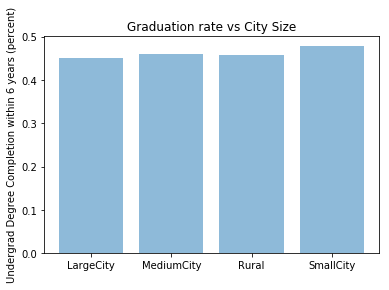

In [23]:
#create Bar graph of grad rates per city size
objects = ('LargeCity', "MediumCity", "Rural", "SmallCity")
y_pos = np.arange(len(objects))

plt.bar(objects, avgComp1, align="center", alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel("Undergrad Degree Completion within 6 years (percent)")
plt.title("Graduation rate vs City Size")

plt.savefig("Graduation_Rate_v_City_Size.png")

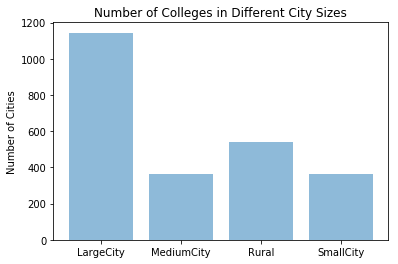

In [24]:
#count of schools per city size
plt.bar(objects, avgComp["City Size Count"], align="center", alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel("Number of Cities")
plt.title("Number of Colleges in Different City Sizes")

plt.savefig("Number_of_Colleges_in_Different_City_Sizes.png")